# <center> BANK MARKETING ANALYSIS

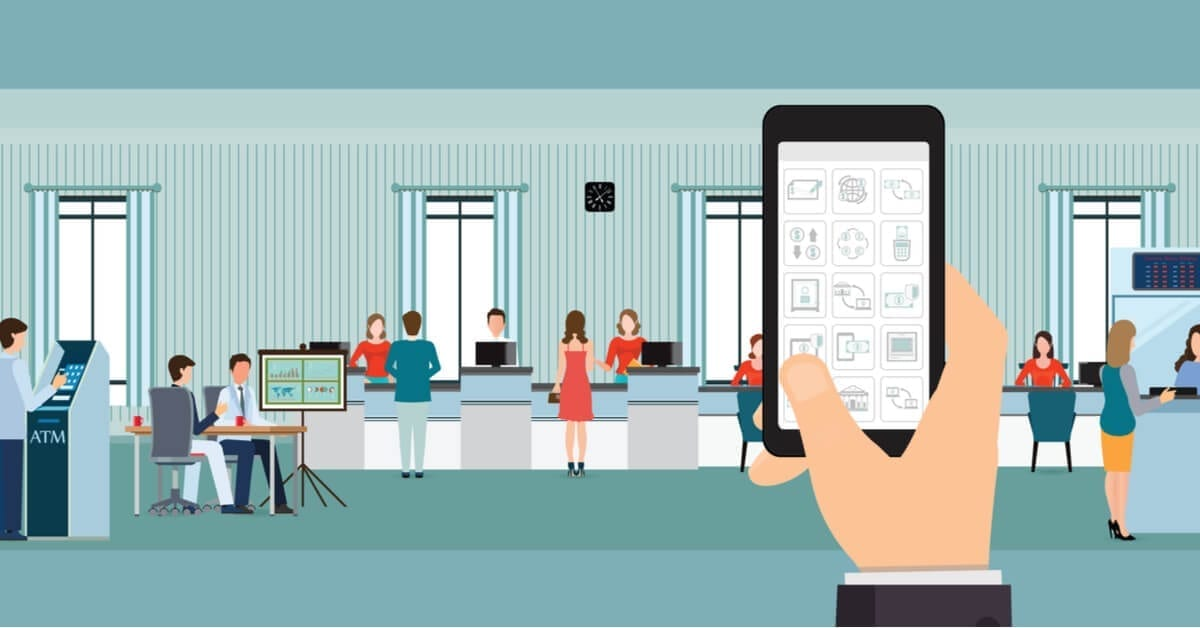

In [3]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
import warnings  # For managing warnings
warnings.filterwarnings("ignore")  # To suppress warnings
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,StandardScaler,MaxAbsScaler  # For encoding and scaling
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier  # For KNN classifier
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.ensemble import GradientBoostingClassifier  # For Gradient Boosting
from xgboost import XGBClassifier  # For XGBoost
from lightgbm import LGBMClassifier  # For LightGBM
from sklearn.metrics import accuracy_score  # For evaluating model accuracy
from tabulate import tabulate  # For pretty-printing tables

In [4]:
df=pd.read_csv(r"C:\Users\NIHAL\Downloads\Bank Marketing Dataset.csv")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("-"*50)
    print("\n")

age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
--------------------------------------------------


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
--------------------------------------------------


marital
['married' 'single' 'divorced']
--------------------------------------------------


education
['secondary' 'tertiary' 'primary' 'unknown']
--------------------------------------------------


default
['no' 'yes']
--------------------------------------------------


balance
[2343   45 1270 ... 1594 2593 -134]
--------------------------------------------------


housing
['yes' 'no']
--------------------------------------------------


loan
['no' 'yes']
---------------------------------------

# Outlier Detection

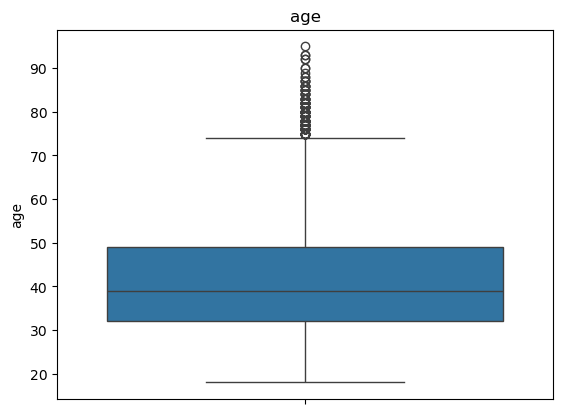

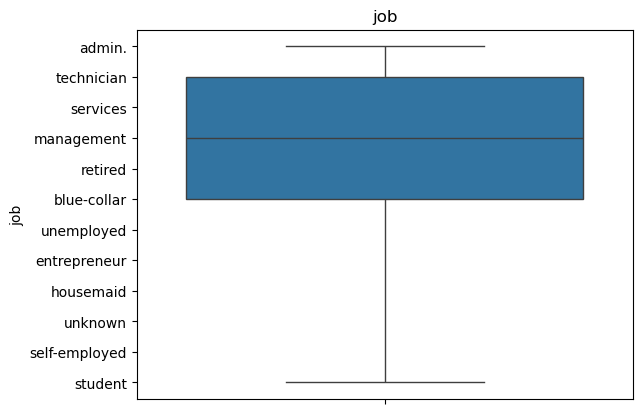

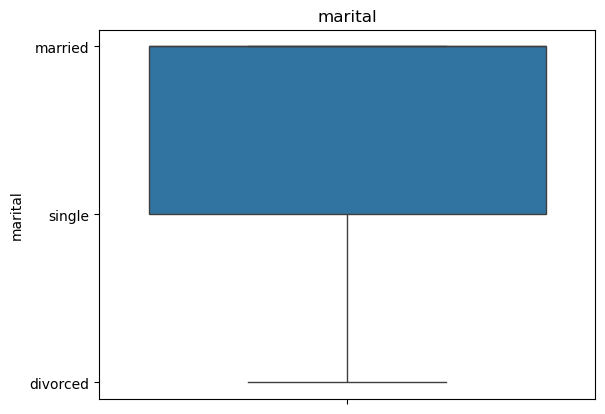

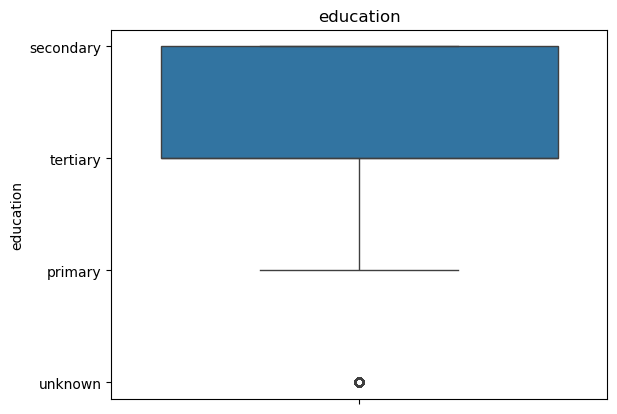

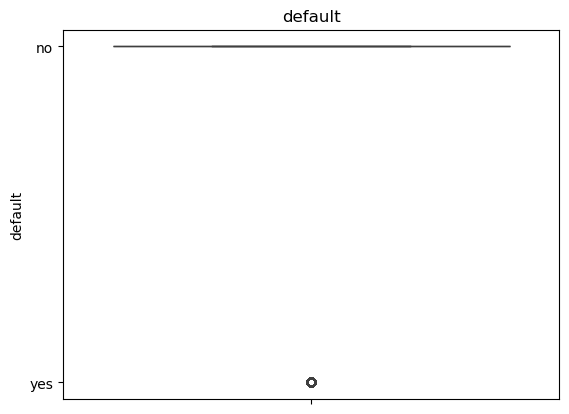

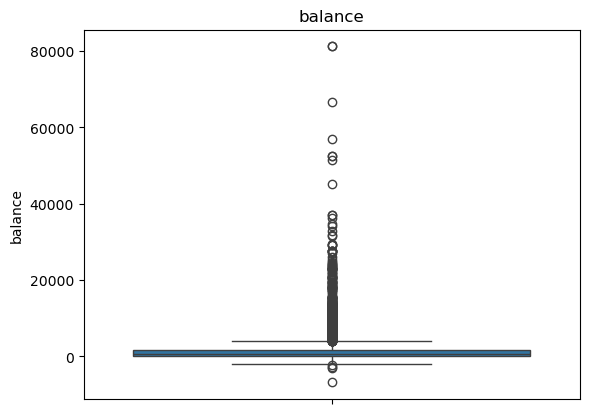

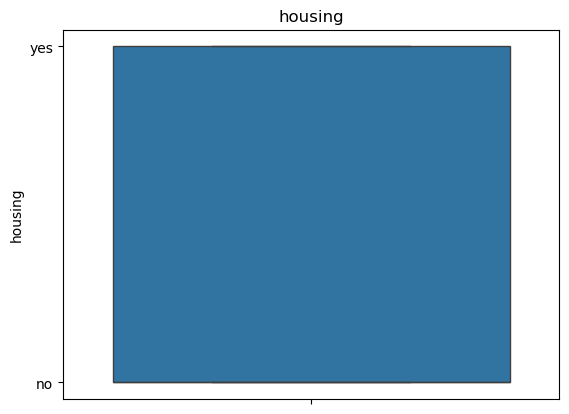

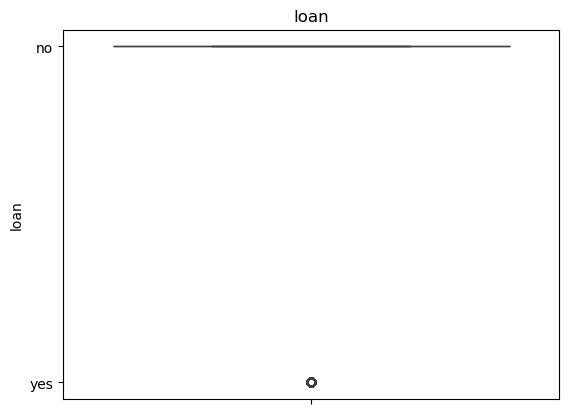

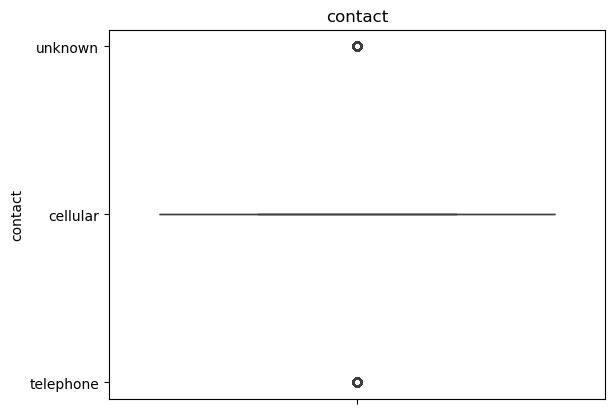

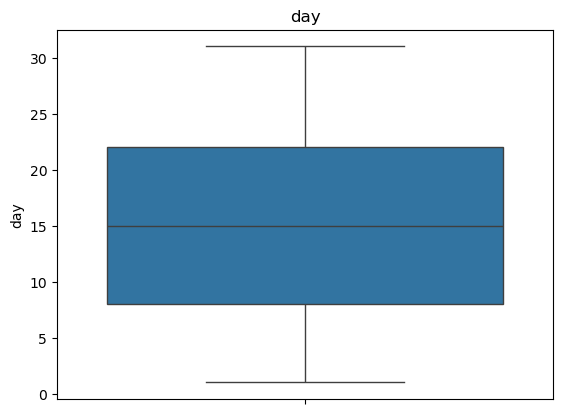

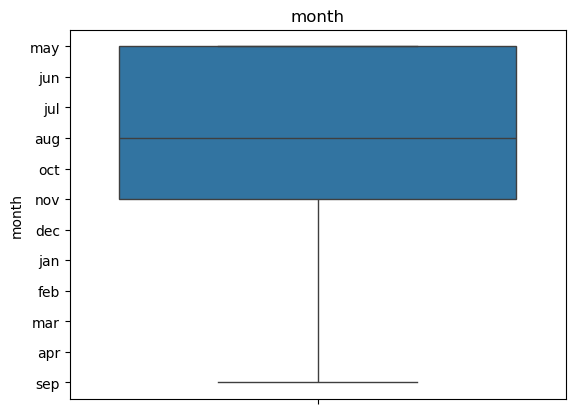

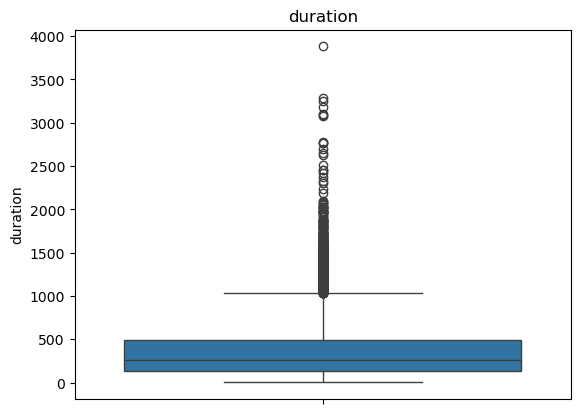

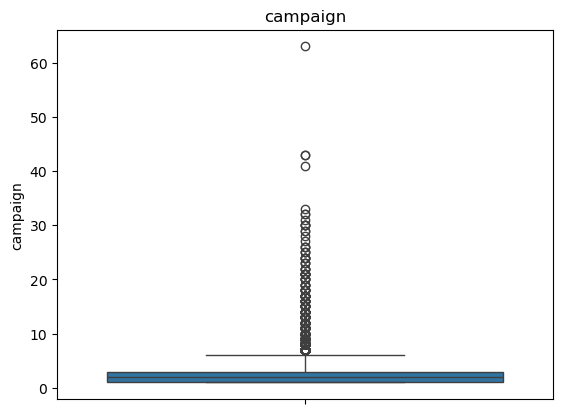

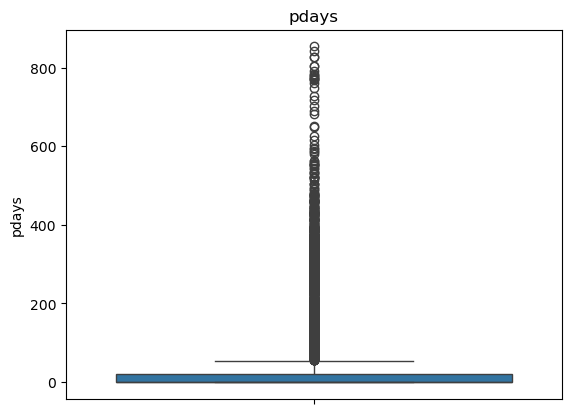

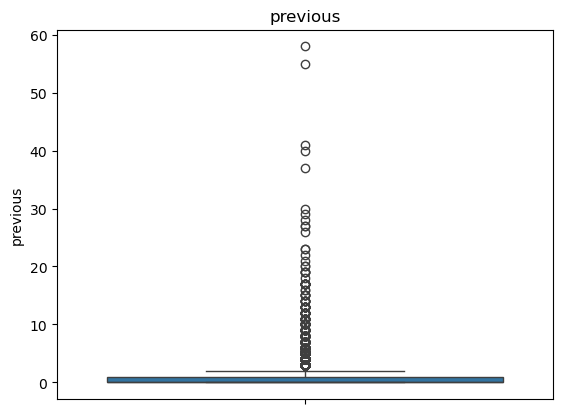

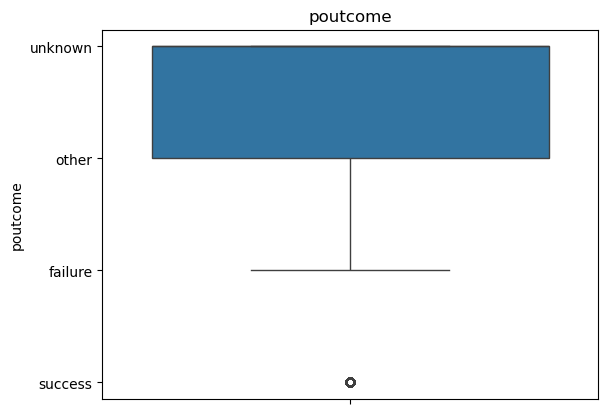

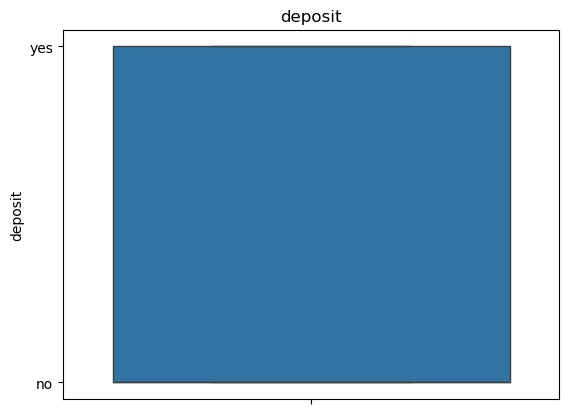

In [12]:
for i in df:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [13]:
num_df=df.select_dtypes(include='int')
num_df

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


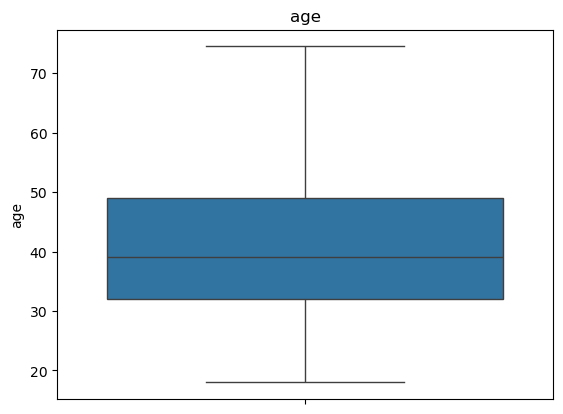

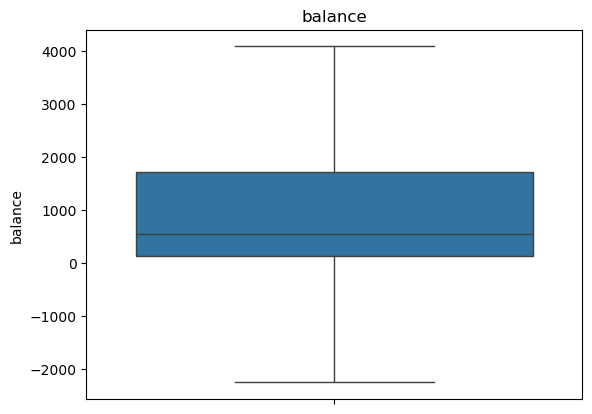

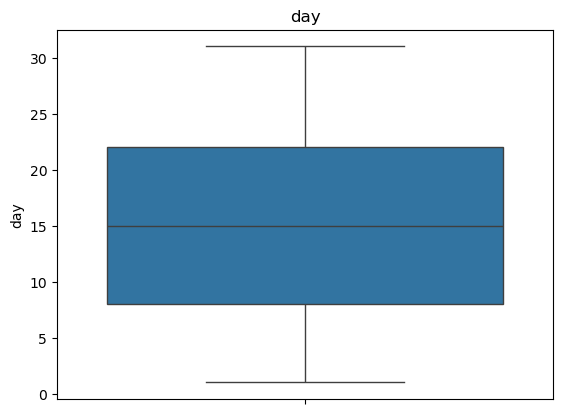

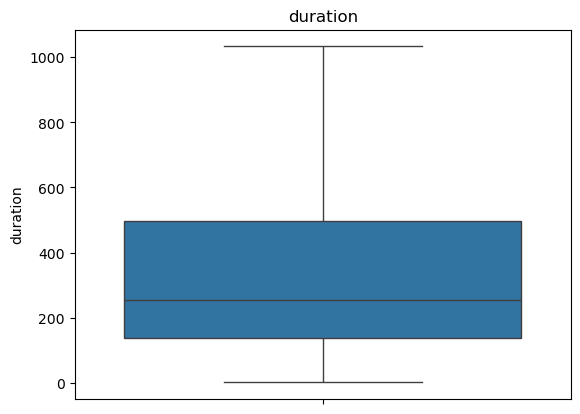

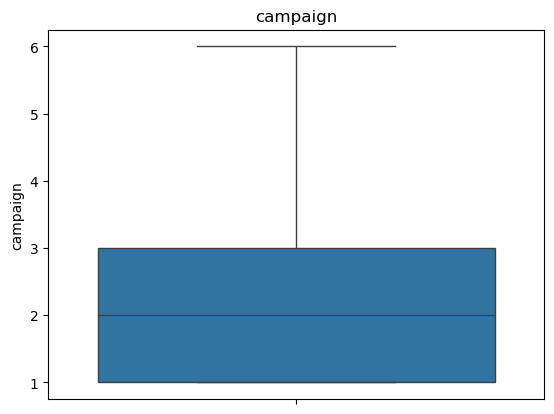

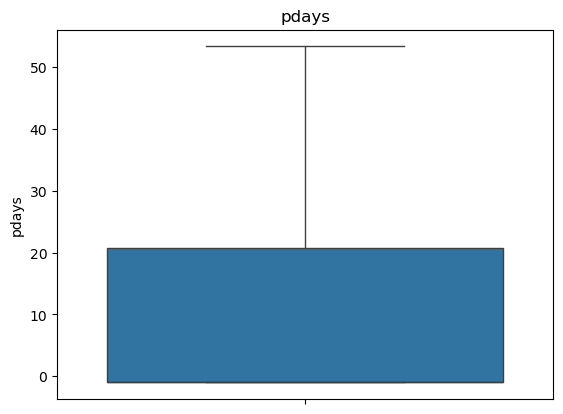

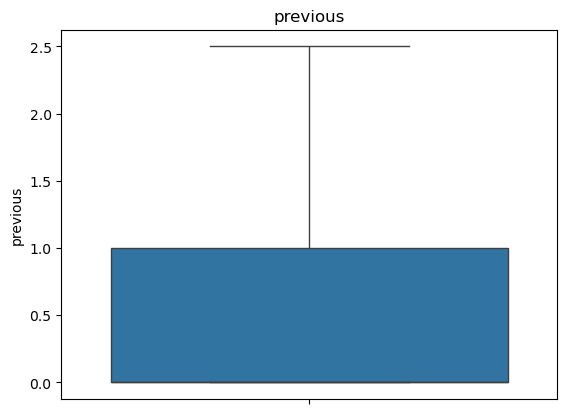

In [14]:
for i in num_df:
    Q1=num_df[i].quantile(0.25) 
    Q3=num_df[i].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    num_df[i] = np.clip(num_df[i], Lower_Whisker, Upper_Whisker) 
    plt.title(i)
    sns.boxplot(num_df[i])
    plt.show()

# Exploratory Data Analysis

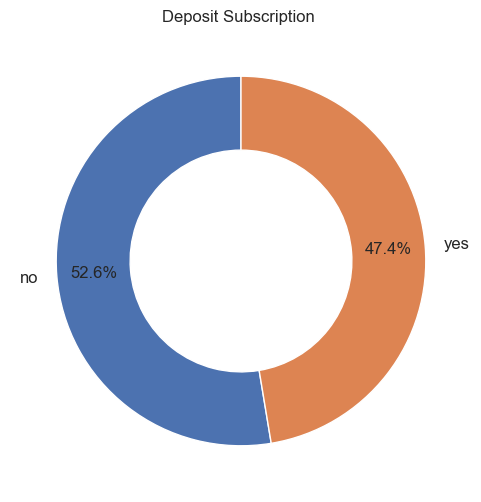

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
deposit_counts = df['deposit'].value_counts()
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%',
        startangle=90, wedgeprops={'width': 0.4},textprops={'fontsize':12},pctdistance=0.8)
plt.title("Deposit Subscription ")
plt.show()

- The pie chart illustrates the distribution of deposit subscriptions, with a slight majority (52.6%) not subscribing and a significant minority (47.4%) subscribing.
- The data suggests that nearly half of the individuals or entities represented in the data have subscribed to a deposit, indicating a substantial level of interest or engagement.
- The chart provides a clear visual representation of the data, allowing for easy comparison between the two categories.


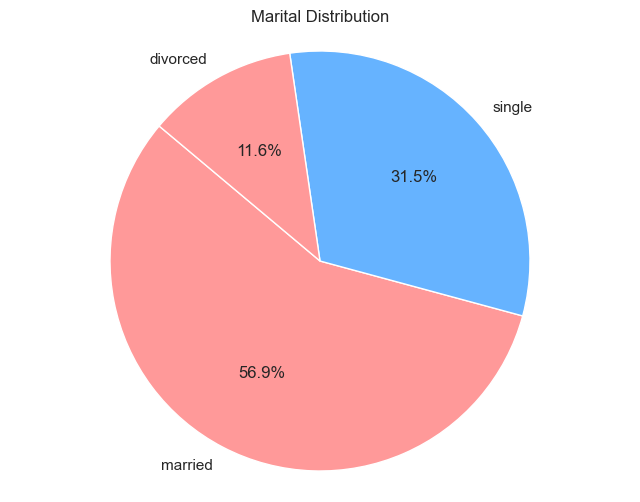

In [18]:
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(8, 6))
colors=['#FF9999','#66B3FF']
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Marital Distribution')
plt.axis('equal')  
plt.show()

- The majority of the dataset (56.9%) consists of married individuals, indicating that more than half of the population is in a marital relationship.

- A significant proportion (31.5%) of the dataset is comprised of single individuals, suggesting that nearly one-third of the population is not married.

- The remaining 11.6% of the dataset represents divorced individuals, indicating that a relatively smaller proportion of the population has experienced divorce.

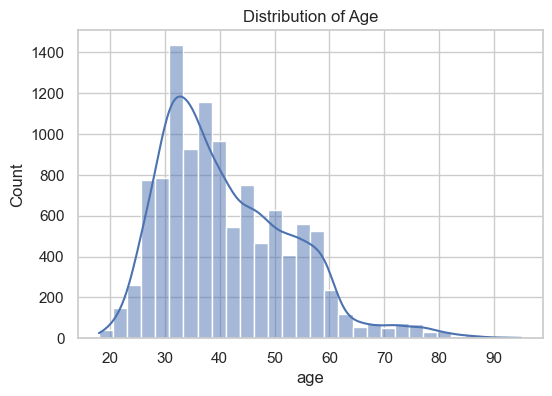

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

- Most customers are between 25 and 45 years old.

- Peak is around 30–35 years.

- Few customers are older than 60

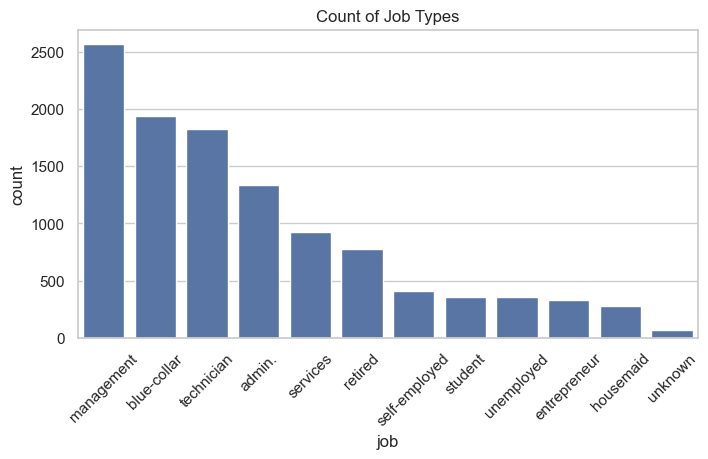

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Count of Job Types')
plt.xticks(rotation=45)
plt.show()

- Most people work in management jobs.


- Blue-collar and technician jobs are also very common.



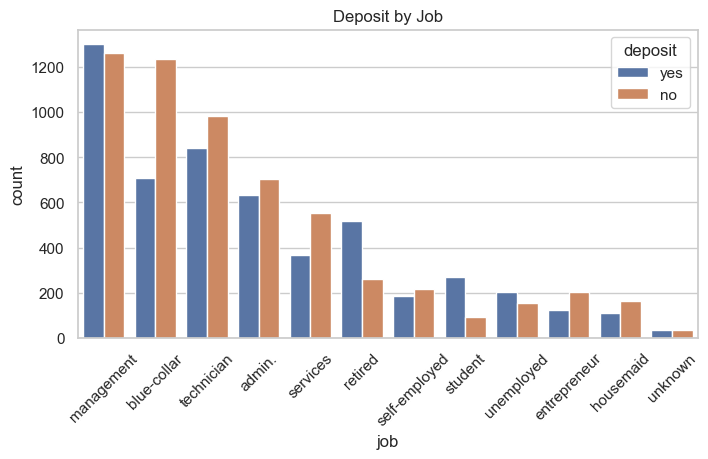

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='job', hue='deposit', order=df['job'].value_counts().index)
plt.title('Deposit by Job')
plt.xticks(rotation=45)
plt.show()

- Management people had more deposits than no deposits.
- Blue-collar workers had many entries, but most did not deposit.



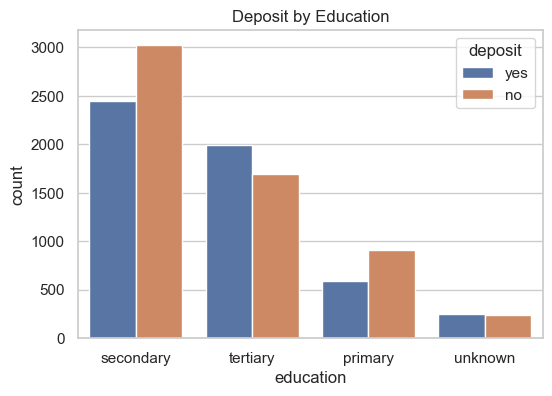

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='education', hue='deposit', order=df['education'].value_counts().index)
plt.title('Deposit by Education')
plt.show()

- People with secondary education said no to deposit the most.


- People with tertiary education had more yes than no.




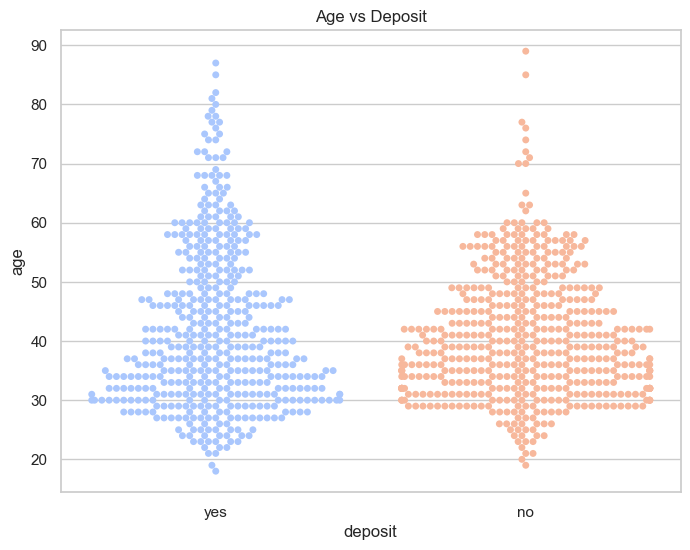

In [28]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df.sample(1000), x='deposit', y='age', palette='coolwarm')
plt.title("Age vs Deposit")
plt.show()


- Most people who said yes to deposit are between 30 and 40 years old.


- People who said no are also mostly in the 30–40 age range.


- Very few older people (60+) made deposits.



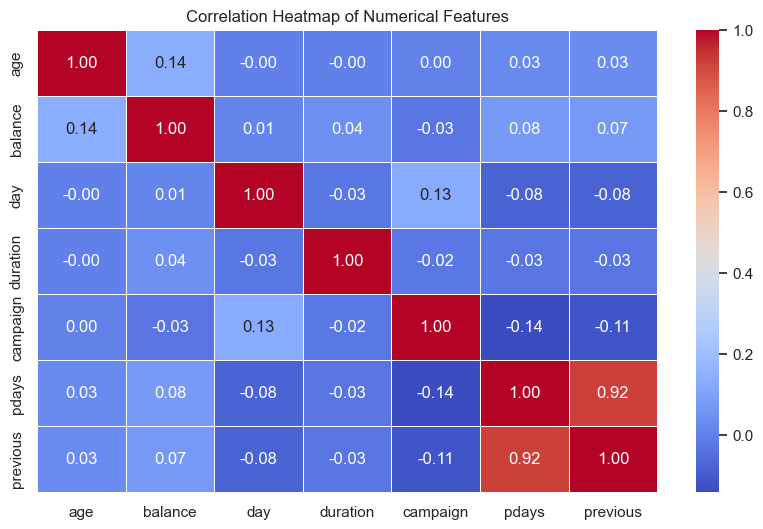

In [30]:
corr = num_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Most numbers are small, so most features don’t affect each other much.

- The strongest link is between pdays and previous (0.92) 

- Age and balance (0.14) have a small link 

In [32]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
grouped['month'] = pd.Categorical(grouped['month'], categories=month_order, ordered=True)

NameError: name 'grouped' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x='day', y='month', size='deposit', hue='deposit',
                palette='coolwarm', sizes=(20, 200), legend=False)
plt.title('Deposit Rate by Day and Month (Bubble Size = Rate)')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()

- March and December have the highest deposit rates — big, dark red bubbles appear often.


- May, June, July, and August have lower deposit rates — bubbles are mostly small and light-colored.


- Higher rates often happen near the end of each month — especially after day 20.




# Ordinal Encoding

In [ ]:
edu_dict=['tertiary','secondary', 'primary', 'unknown']
df['education'] = OrdinalEncoder(categories=[edu_dict]).fit_transform(df[['education']])
df['education']

# Label Encoding

In [ ]:
car_df=df.select_dtypes(include='object')
le=LabelEncoder()
for i in car_df:
    car_df[i]=le.fit_transform(car_df[i]) 
car_df

In [ ]:
edu=df.drop(['age', 'job', 'marital', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','deposit'],axis=1)
edu

In [ ]:
df1=pd.concat([num_df,edu,car_df],axis=1)
df1

In [ ]:
data1=df1.copy()

In [ ]:
sum(df.duplicated(df.columns))

# MinMaxScaling

In [ ]:
rs=MaxAbsScaler()
scaled_df=rs.fit_transform(df1)
scaled_df

In [ ]:
data = pd.DataFrame(scaled_df, columns=df1.columns)
data

In [ ]:
x=data.drop(['deposit'],axis=1)
y=data['deposit']

In [ ]:
x

In [ ]:
y

# Classification

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## K-Nearest Neighbors (KNN)

In [ ]:
metrics_k=[]
neighbors=range(1,12)
for k in neighbors:

    knn = KNeighborsClassifier(n_neighbors=k) 
    knn_model = knn.fit(x_train, y_train) 
    knn_pred = knn_model.predict(x_test)
    acc_knn=accuracy_score(y_test,knn_pred)
    metrics_k.append(acc_knn)

In [ ]:
plt.plot(neighbors,metrics_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('accuracies')
plt.grid

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9) 
knn_model = knn.fit(x_train, y_train) 
knn_pred = knn_model.predict(x_test)
print('Accuracy Score:',(accuracy_score(y_test,knn_pred))*100)

## Logistic Regression

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print('Accuracy Score:',(accuracy_score(y_test,y_pred))*100)

## Gradient Boosting Classifier 

In [ ]:
gbc = GradientBoostingClassifier() 
gbc_model = gbc.fit(x_train, y_train) 
gbc_pred = gbc_model.predict(x_test)
print('Accuracy Score:',(accuracy_score(y_test,gbc_pred))*100)

## XGBoost Classifier 

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') 
xgb_model = xgb.fit(x_train, y_train) 
xgb_pred = xgb_model.predict(x_test) 
print('Accuracy Score:', (accuracy_score(y_test, xgb_pred))*100)

## LightGBM Classifier 

In [ ]:
lgb = LGBMClassifier(verbosity=-1) 
lgb_model = lgb.fit(x_train, y_train) 
lgb_pred = lgb_model.predict(x_test)
print('Accuracy Score:',(accuracy_score(y_test,lgb_pred))*100)

# Tabular Form of Accuracy

In [ ]:
table = [['Model', 'Accuracy'], ['Logistic Regression', (accuracy_score(y_test,y_pred))*100], 
         ['KNN',(accuracy_score(y_test , knn_pred))*100],
         ['Gradient',(accuracy_score(y_test,gbc_pred))*100], 
         ['XGB',(accuracy_score(y_test,xgb_pred))*100],['Lightgbm',(accuracy_score(y_test , lgb_pred))*100]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

In [ ]:
data1.sample(5)

In [ ]:
data1.shape

In [ ]:
# sample_data = [[1,1,0,1,0,0,5,3,42.0,634,24,256,2,-1.0,0.0,1.0]]  # Sample data for prediction
# sample_data = [[1,1,0,1,0,0,5,3,42.0,634,24,256,2,-1.0,0.0,1.0,0.5]]  # Now has 17 values
sample_data = [[1,1,0,1,0,0,5,3,42.0,634,24,256,2,-1.0,0.0,1.0]]
sample_data_scaled = rs.transform(sample_data)
prediction = lgb.predict(sample_data_scaled)
print("Final Prediction:",prediction)

In [ ]:
print("Scaler expects features:", rs.n_features_in_)
print("Model expects features:", lgb.n_features_in_)

In [ ]:
print(df.columns)  # See the order of features
print(df.iloc[0].values)  # Use a real row as a sample

In [ ]:
df1

In [ ]:
data1

In [ ]:
car_df

In [ ]:
num_df

In [ ]:
edu

In [ ]:
df = pd.read_csv("C:\\Users\\NIHAL\\Downloads\\Bank Marketing Dataset.csv")
print("Number of features:", df.shape[1])

In [ ]:
sample_data = [[1, 1, 0, 1, 0, 0, 5, 3, 42.0, 634, 24, 256, 2, -1.0, 0.0, 1.0, 0.5]]

In [ ]:
sample_data_scaled = rs.transform(sample_data)
prediction = lgb.predict(sample_data_scaled)
print("Final Prediction:", prediction)

In [ ]:
sample_data = [df.iloc[0].values.tolist()]

In [ ]:
sample_data